Tautkan ke google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


cek file dulu

In [ ]:
cd /content/drive/MyDrive/Dataset/CNN2

/content/drive/MyDrive/Dataset/CNN2


In [ ]:
ls

100ribu/  10ribu/  1ribu/  20ribu/  2ribu/  50ribu/  5ribu/  75ribu/


import alatnya

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from PIL import Image
from imutils import paths
import numpy as np
import os

load dataset

In [ ]:
data_dir = "/content/drive/MyDrive/Dataset/CNN2" #ini ganti path sesuai datasetnya
imagePaths = paths.list_images(data_dir)
data = []
labels = []

In [ ]:
label_map = {
    "1ribu": 0,
    "2ribu": 1,
    "5ribu": 2,
    "10ribu": 3,
    "20ribu": 4,
    "50ribu": 5,
    "75ribu": 6,
    "100ribu": 7
}

In [ ]:
from PIL import ImageOps

for imagePath in imagePaths:

    image = Image.open(imagePath).convert('RGB')

    image = np.array(image) / 255.0

    data.append(image)

    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

In [ ]:
print(labels)

['1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', '1ribu', 

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [ ]:
print(np.array(data).shape)

(2800, 224, 224, 3)


split data

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.20, shuffle=True, stratify=labels)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2240, 224, 224, 3)
(560, 224, 224, 3)
(2240, 8)
(560, 8)


In [ ]:
print(f"Jumlah gambar pada dataset pelatihan: {trainY.shape}")
print(f"Jumlah gambar pada dataset validasi: {testY.shape}")

Jumlah gambar pada dataset pelatihan: (2240, 8)
Jumlah gambar pada dataset validasi: (560, 8)


In [ ]:
train_class_counts = np.sum(trainY, axis=0)
print("Jumlah gambar per kelas di dataset pelatihan:")
for label, count in zip(lb.classes_, train_class_counts):
    print(f"{label}: {count}")

test_class_counts = np.sum(testY, axis=0)
print("\nJumlah gambar per kelas di dataset validasi:")
for label, count in zip(lb.classes_, test_class_counts):
    print(f"{label}: {count}")

Jumlah gambar per kelas di dataset pelatihan:
100ribu: 280
10ribu: 280
1ribu: 280
20ribu: 280
2ribu: 280
50ribu: 280
5ribu: 280
75ribu: 280

Jumlah gambar per kelas di dataset validasi:
100ribu: 70
10ribu: 70
1ribu: 70
20ribu: 70
2ribu: 70
50ribu: 70
5ribu: 70
75ribu: 70


data augmentatioon

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    fill_mode='nearest'
)

definisikan model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(lb.classes_), activation='softmax'))

In [ ]:
model.layers

[<Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <MaxPooling2D name=max_pooling2d_4, built=True>,
 <Conv2D name=conv2d_5, built=True>,
 <MaxPooling2D name=max_pooling2d_5, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,246,728 (84.86 MB)

 Trainable params: 22,246,728 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

training model pakai adam

In [ ]:
from keras.callbacks import ModelCheckpoint, Callback

class AccuracyStopping(Callback):
    def __init__(self, target_accuracy=0.90):
        super().__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get("accuracy")
        if accuracy is not None and accuracy >= self.target_accuracy:
            print(f"\nAkurasi telah mencapai {accuracy:.2%}, menghentikan pelatihan.")
            self.model.stop_training = True

In [ ]:
checkpoint_path = '/content/drive/MyDrive/models/CNN9.keras'

In [ ]:
checkpoint = ModelCheckpoint(
    checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1
)

In [ ]:
with tf.device('/GPU:0'):
    H = model.fit(
        datagen.flow(trainX, trainY, batch_size=32),
        validation_data=(testX, testY),
        epochs=50,
        callbacks=[
            checkpoint,
            AccuracyStopping(0.90)
        ]
    )

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2464 - loss: 2.1243
Epoch 1: val_loss improved from inf to 0.79402, saving model to /content/drive/MyDrive/models/CNN9.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 341s 5s/step - accuracy: 0.2480 - loss: 2.1188 - val_accuracy: 0.7357 - val_loss: 0.7940
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6100 - loss: 1.0472
Epoch 2: val_loss improved from 0.79402 to 0.60059, saving model to /content/drive/MyDrive/models/CNN9.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 313s 4s/step - accuracy: 0.6107 - loss: 1.0460 - val_accuracy: 0.7875 - val_loss: 0.6006
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7193 - loss: 0.8092
Epoch 3: val_loss improved from 0.60059 to 0.28094, saving model to /content/drive/MyDrive/models/CNN9.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 312s 4s/step - accuracy: 0.7198 - loss: 0.8079 - val_accuracy: 0.9232 - val_loss: 0.2809
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8306 - loss: 0.5175
Epoch 4:

evaluasi model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report


predictions = model.predict(testX)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 939ms/step
              precision    recall  f1-score   support

     100ribu       1.00      0.99      0.99        70
      10ribu       0.99      0.99      0.99        70
       1ribu       1.00      0.99      0.99        70
      20ribu       1.00      0.99      0.99        70
       2ribu       0.96      1.00      0.98        70
      50ribu       1.00      0.99      0.99        70
       5ribu       1.00      1.00      1.00        70
      75ribu       0.99      1.00      0.99        70

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



summarize histori

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


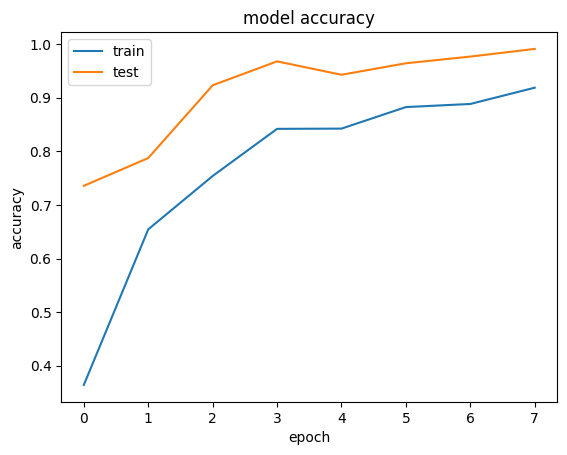

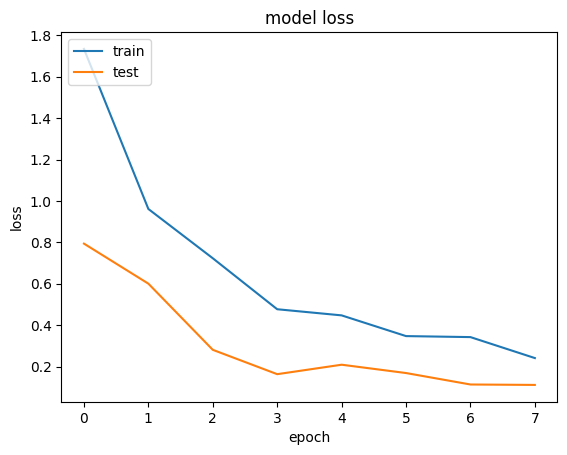

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

masukkan gambar

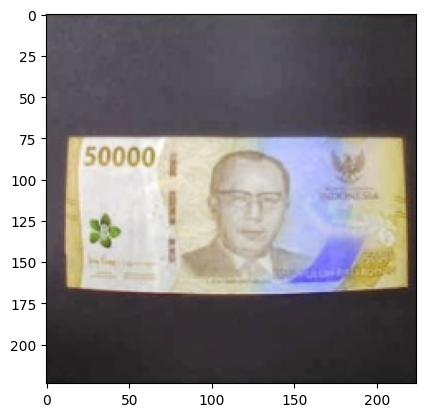

In [ ]:
import cv2
import matplotlib.pyplot as plt

gambar = '/content/drive/MyDrive/Dataset/50ribu.jpg' #nama file gambarnya
image = cv2.imread(gambar)
plt.imshow(image)
plt.show()

In [ ]:
image_test = Image.open(gambar)
image_test = np.array(image_test.resize((224,224))) / 255.0
image_test.shape

(224, 224, 3)

In [ ]:
image_test = np.expand_dims(image_test, axis=0)
image_test.shape

(1, 224, 224, 3)

In [ ]:
predict = model.predict(image_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [ ]:
print(predict)

[[1.4342047e-06 3.8880038e-03 1.2140236e-05 5.6524796e-04 1.8292442e-02
  9.7722322e-01 1.7426642e-05 8.2890018e-08]]


In [ ]:
print(lb.classes_[predict.argmax()])

50ribu


In [ ]:
from tensorflow.keras.models import load_model

keras_model_path = '/content/drive/MyDrive/models/CNN9.keras'

h5_model_path = '/content/drive/MyDrive/models/CNN9.h5'

model = load_model(keras_model_path)

model.save(h5_model_path)

print(f"Model berhasil dikonversi dari .keras ke .h5 dan disimpan di {h5_model_path}")

Model berhasil dikonversi dari .keras ke .h5 dan disimpan di /content/drive/MyDrive/models/CNN9.h5
